 # Abstract

<h4 align="justify"> The purpose of my statistical, exploratory data analysis and notebook is studying the dataset “ Housing Prices of Boston”which are affecting the prices of houses and other columns which will be taken into consideration as factors which might affect the prices.The dataset has 5,00,000 rows. The main focus is to run an automfor different runtime(here 1000 seconds) and generate a leaderboard through which we need to find the hyperparameters of each model which will later be used to generate a hyperparameter database. The main objective of this hyperparameter database is to give the range or values of hyperparameter for each public dataset, for this it is required to run millions of datasets and their hyperparameter values for different combination of hyperparameter and then gives the best result. The hyperparameter database will produce the range without search which can later be used to visualize and understand statistical concepts of bias/variance trade off. The three important aspects considered while running this automl are to finding the important hyperparameters, finding the range of the important hyperparameter and later is to show the difference of each model, as in how one is better than the other in giving better predictive results.</h3>

### Running the automl for 1000 seconds

#### **Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import missingno as msno
from math import* 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

**Importing the libraries and reading the dataset from CSV file**

In [2]:
# importing the dataset
df=pd.read_csv("HousePrices_HalfMil.csv", decimal = ',')

In [3]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


**Checking the first 5 rows of the dataset to analyse the column types and to check if the data is properly imported or not**

In [4]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


**Taking the general idea about the dataset, it gives all the statistical parameters of each numerical columns**

In [5]:
top_housing_prices = df.sort_values('Prices',ascending=False)
# Look at top 20
top_housing_prices[['Prices','Area']].head(20)

,Prices,Area
360194,77975,241
255760,77700,230
223348,77525,233
176716,77375,227
325338,77250,222
425570,77225,211
130103,77225,241
156202,77175,239
276143,77075,235
136879,77000,242


**Checking the top 20 Houses with their areas and prices**

C:\Users\jyoti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


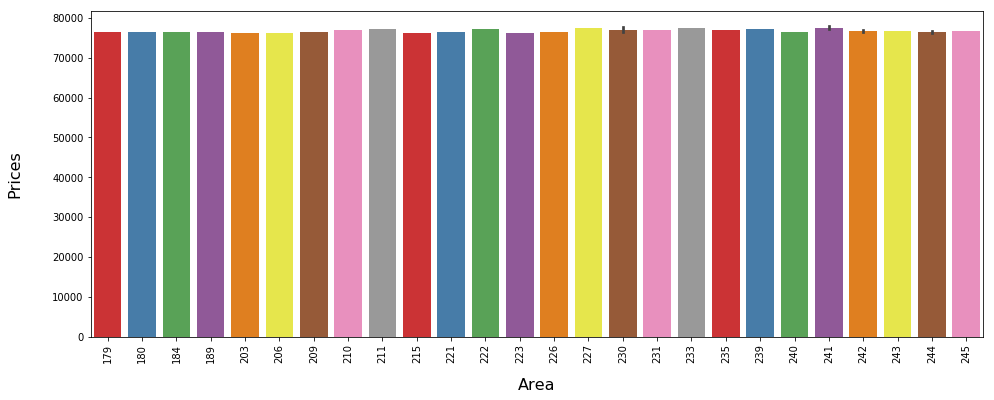

In [6]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Area', y='Prices', data=top_housing_prices.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

**Making a barplot of top 20 Prices of houses and last 20 houses's prices according to its Area**

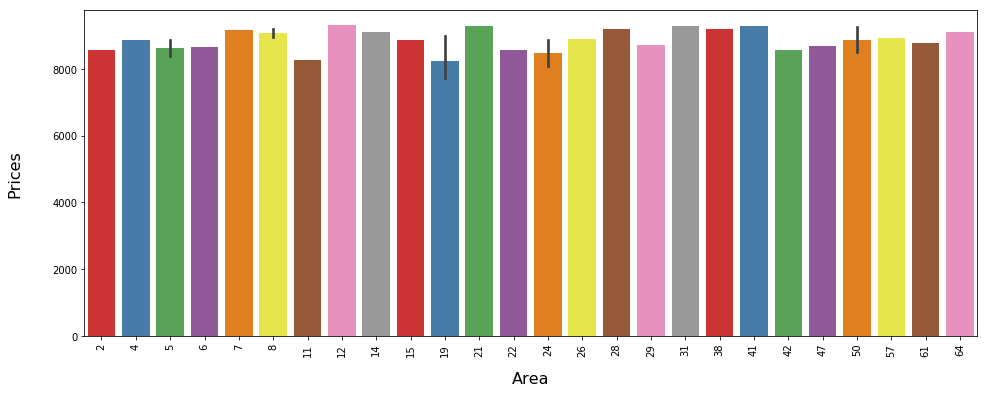

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Area', y='Prices', data=top_housing_prices.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [8]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent


**Checking the columns and the number of missing entries in them
Examining this is important as because of this the dataset can lose expressiveness, which can lead to weak and biased analyses**

In [9]:
print(np.isnan(df['Prices']))

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
499970    False
499971    False
499972    False
499973    False
499974    False
499975    False
499976    False
499977    False
499978    False
499979    False
499980    False
499981    False
499982    False
499983    False
499984    False
499985    False
499986    False
499987    False
499988    False
499989    False
499990    False
499991    False
499992    False
499993    False
499994    False
499995    False
499996    False
499997    False
499998    False
499999    False
Name: Prices, Length: 50

**Through above code we can see that no element here is null, thus we dont have to drop any row**

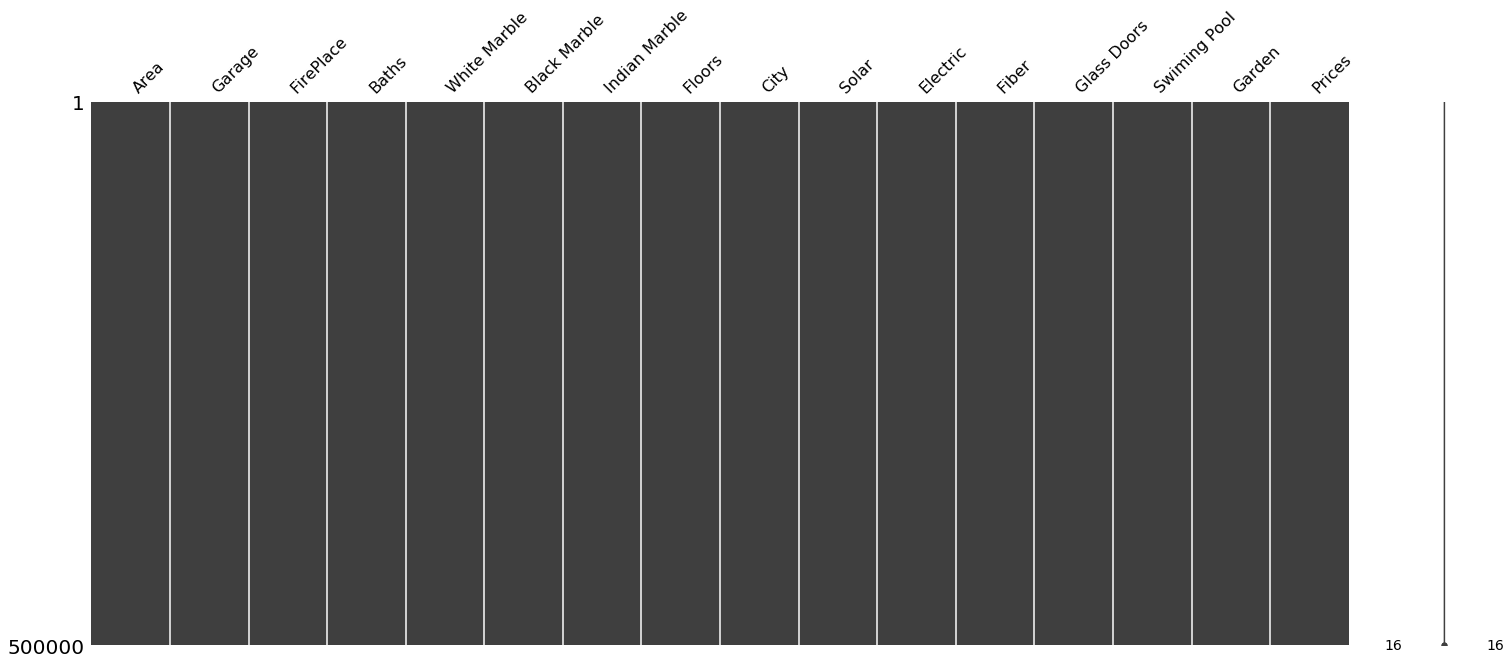

In [10]:
msno.matrix(df)

**The above graph shows that there are no missing values**

In [11]:
df.skew()

Area             0.000324
Garage          -0.002371
FirePlace       -0.002794
Baths            0.000948
White Marble     0.708739
Black Marble     0.710182
Indian Marble    0.702414
Floors           0.002456
City            -0.001726
Solar            0.005224
Electric        -0.002600
Fiber           -0.001872
Glass Doors      0.000520
Swiming Pool    -0.001744
Garden          -0.006584
Prices           0.035845
dtype: float64

**Skewness tells how assymmetric data is spread around the mean.. If the right tail of histogram then positive skew and negative tail is negative skew**

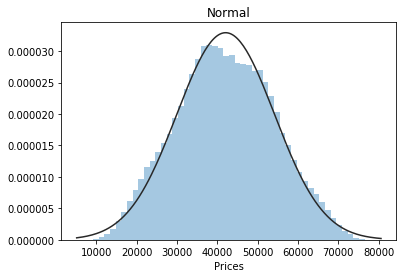

In [12]:
y = df['Prices']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

**The above graph shows if the dataset is normally distributed or not**

In [13]:
df.kurt()

Area            -1.197962
Garage          -1.501864
FirePlace       -1.299839
Baths           -1.299702
White Marble    -1.497695
Black Marble    -1.495648
Indian Marble   -1.506620
Floors          -2.000002
City            -1.498939
Solar           -1.999981
Electric        -2.000001
Fiber           -2.000004
Glass Doors     -2.000008
Swiming Pool    -2.000005
Garden          -1.999965
Prices          -0.492333
dtype: float64

**The higher the kurtosis the longer is the tail of the histogram which can be seen in the above graph of skewness, but here the kurtosis ins't higher for any column**

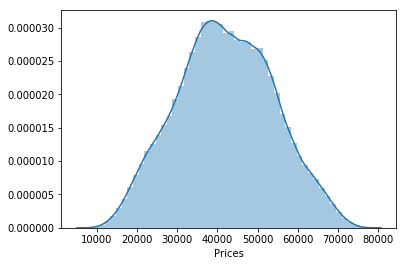

In [14]:
sns.distplot(df['Prices'])

**Dist plot shows hw symettrically the data is spread as we are doing regression we need to check for this, we can see the data is symmetrical**

In [15]:
df.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


**Dist plot shows hw symettrically the data is spread as we are doing regression we need to check for this, we can see the data is symmetrical**

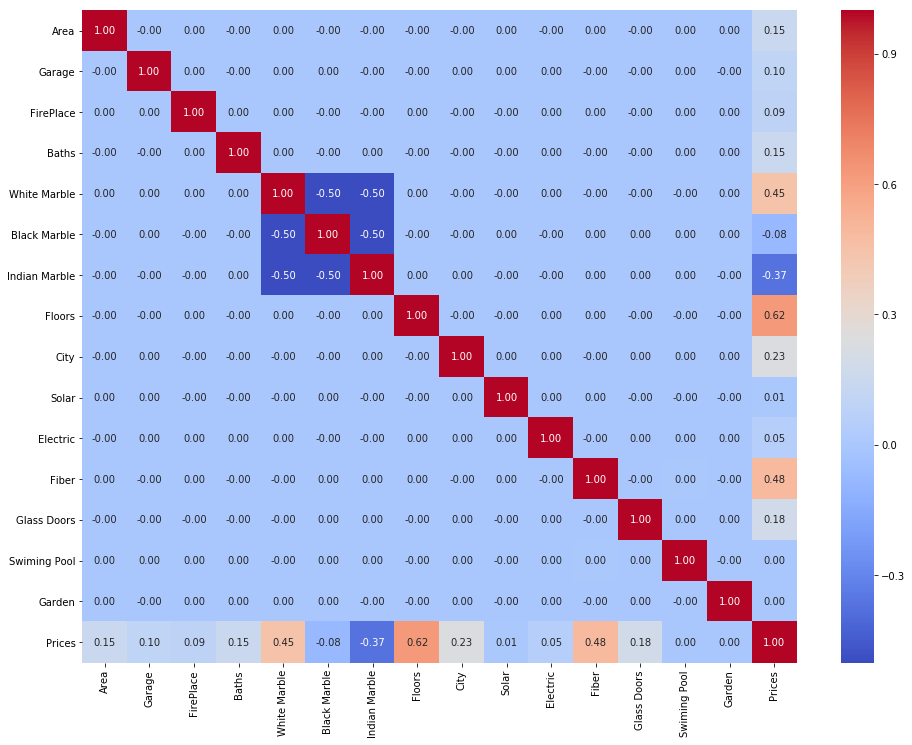

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**Heat map represents the corealtion in a better way**
**Here we can see that White Marble,Indian Marble, Fiber and Floors are max corelated**
**Indian Marble and White Marble are corelated with each other as well**

In [17]:
xs = df[['Area','Garage','FirePlace','Baths','White Marble','Black Marble','Indian Marble','Floors','City','Solar','Electric','Fiber','Glass Doors','Swiming Pool','Garden']]
ys = df['Prices']
len(xs), len(ys)

(500000, 500000)

**Checking the total number of rows in our dataset**

In [18]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

**Importing required H2o packages**

In [22]:
data_path = (r'C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\HousePrices_HalfMil.csv')

In [23]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1                        # Number of parallel threads used to run Algorithms
min_mem_size=12
classification= False
scale=False
max_models=None    
model_path=None
balance_y=False 
balance_threshold=0.2             
name=None 
server_path=None  
analysis=0

**Setting the values of the arguments that has to be passes while initialising the H2O**

In [24]:
run_time =  1000

**The runtime to run the automl for the generation of leaderboard is of 2000 seconds**

In [25]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size, "GB")

2 GB


**Setting the min_mem_size which is the memory given to automl in the system is fixed to 5 GB**

In [26]:
#Defining functions

#generating random run_id
def alphabet(n):
    alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
    str=''
    r=len(alpha)-1   
    while len(str)<n:
        i=random.randint(0,r)
        str+=alpha[i]   
    return str

# storing in m_data dictionary  
def set_meta_data(analysis,run_id,server,data,model_path,run_time,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
    
    
    m_data={}
    # m_data['target']=target
    #m_data['classification']=classification
    m_data['project'] =name
    m_data['run_time']=run_time
    m_data['run_id'] =run_id
    m_data['start_time_sec'] = time.time()
    m_data['min_mem_size'] = min_mem_size
    m_data['balance']=balance
    m_data['balance_threshold']=balance_threshold 
    m_data['max_models']=model
    m_data['scale']=scale  
    m_data['scale']=False
    m_data['model_path']=model_path
    m_data['server_path']=server
    m_data['data_path']=data 
    m_data['run_path'] =path
    m_data['nthreads'] = nthreads
  
    m_data['analysis'] = analysis
    m_data['end_time_sec'] = time.time()  
    return m_data

#converting dictionary to json
def dict_to_json(dct,n):
    j = json.dumps(dct, indent=4)
    f = open(n, 'w')
    print(j, file=f)
    f.close()
    
def get_all_variables_csv(i):
    ivd={}
    try:
        iv = pd.read_csv(i,header=None)
    except:
        sys.exit(1)    
    col=iv.values.tolist()[0]
    dt=iv.values.tolist()[1]
    i=0
    for c in col:
        ivd[c.strip()]=dt[i].strip()
        i+=1        
    return ivd
    
# Segregating in different lists of int, enum, reals and checking for missing values and then scaling(standardizing)    
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return

# Determining Independent variables (X) from the dataset 
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

#Checkinh if X does not exist then remove
def check_X(x,df):
    for name in x:
        if name not in df.columns:
            x.remove(name)  
    return x

**Above functions are the metadata and the such as name of the model, creating unique name to the folders and the model, runtime of each model, setting the server path and data path etc**

In [27]:
#RUN_ID

#randomly generating run_id through alphabet function
run_id=alphabet(9)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
a = run_id + '_EmpAccess_' + str(run_time)
run_dir = os.path.join(server_path,a)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)


Mm6uuQsCb


**Using the above function a unique name code has been generated for the model, each time we run the function the model code is going to get changed**

-  **Creating a log file**
-  **logfile=run_id+'_autoh2o_log.zip'**
-  **logs_path=os.path.join(run_dir,'logs')**
-  **print(logs_path,' ',logfile)**

In [29]:
name = run_id+'_EmpAccess_' + str(run_time)
name

'Mm6uuQsCb_EmpAccess_1000'

In [30]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,model_path,run_time,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'project': 'Mm6uuQsCb_EmpAccess_1000', 'run_time': 1000, 'run_id': 'Mm6uuQsCb', 'start_time_sec': 1556318291.4987745, 'min_mem_size': 2, 'balance': False, 'balance_threshold': 0.2, 'max_models': None, 'scale': False, 'model_path': None, 'server_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project', 'data_path': None, 'run_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project\\Mm6uuQsCb_EmpAccess_1000', 'nthreads': 1, 'analysis': 0, 'end_time_sec': 1556318291.4987745}


**Setting the values for the metadata file**

In [31]:
if classification :
    meta_data["Problem_type"] = "Classification"
    print("Problem Type:  Classification")
else:
    meta_data["Problem_type"] = "Regression"
    print("Problem Type:  Regression")

Problem Type:  Regression


**Displaying if the problem is of regression type or classification**

### **Initializing H2O**

In [32]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

#initializing H2O
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:14670..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\jyoti\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\jyoti\AppData\Local\Temp\tmp8gbaihni
  JVM stdout: C:\Users\jyoti\AppData\Local\Temp\tmp8gbaihni\h2o_jyoti_started_from_python.out
  JVM stderr: C:\Users\jyoti\AppData\Local\Temp\tmp8gbaihni\h2o_jyoti_started_from_python.err
  Server is running at http://127.0.0.1:14670
Connecting to H2O server at http://127.0.0.1:14670... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_jyoti_tqw7f3
H2O cluster total nodes:,1
H2O cluster free memory:,3.521 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [34]:
data_path = (r'C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\HousePrices_HalfMil.csv')

**Importing the data from the datapath of the system**

In [35]:
print(data_path)

C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\HousePrices_HalfMil.csv


In [36]:
#importing data file on h2o server
data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


**Feeding the data to H2O Automl**

In [37]:
data.head()

Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
124,3,3,3,0,1,0,1,1,0,0,1,1,1,1,54300
58,1,0,2,0,0,1,0,3,0,1,1,1,0,1,34400
249,2,1,1,1,0,0,1,1,0,1,0,1,1,0,50425
243,1,0,2,0,0,1,1,1,0,0,0,0,1,0,29575
242,1,2,4,0,0,1,0,2,1,0,0,0,1,0,22300


In [38]:
rows = len(data)
print("Total rows in the data set = ", rows)
cols = len(data.columns)
print("Total Columns in the data set = ", cols)

rowscols = data.shape
shape = rows * cols
print("rows X columns = ", rowscols)
print("Total Records = ", shape)

meta_data['Total Records'] = shape

Total rows in the data set =  500000
Total Columns in the data set =  16
rows X columns =  (500000, 16)
Total Records =  8000000


**Displaying the details of the dataset above**

In [39]:
name = run_id+'HousePrices_HalfMil_1000'
name

'Mm6uuQsCbHousePrices_HalfMil_1000'

**The above name will be used as folder name to generate the csv and jason files**

In [40]:
# dependent variable
# assign target an d inputs for classification or regression
if target==None:
    target="Prices"   
y = target
meta_data['Target']=y
y

'Prices'

**Setting the name of the columns**

In [41]:
if all_variables is not None:
    ivd=get_all_variables_csv(all_variables)
    print(ivd)    
    X=check_all_variables(data,ivd,y)
    print(X)

In [42]:
# independent variables
# putting all independent variables in the list X 

X = []  
if all_variables is None:
    X=get_independent_variables(data, target)  
    print(X)  
else: 
    ivd=get_all_variables_csv(all_variables)    
    X=check_all_variables(data, ivd)


X=check_X(X,data)


# Add independent variables to meta data

meta_data['X']=X  


# impute missing values

_=impute_missing_values(data,X, scale)

['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden']


**Setting the column name of the predictors in the X**

In [43]:
def get_variables_types(data):
    d={}
    for key, val in data.types.items():
        d[key]=val           
    return d

In [44]:
allV=get_variables_types(data)
allV

{'Area': 'int',
 'Garage': 'int',
 'FirePlace': 'int',
 'Baths': 'int',
 'White Marble': 'int',
 'Black Marble': 'int',
 'Indian Marble': 'int',
 'Floors': 'int',
 'City': 'int',
 'Solar': 'int',
 'Electric': 'int',
 'Fiber': 'int',
 'Glass Doors': 'int',
 'Swiming Pool': 'int',
 'Garden': 'int',
 'Prices': 'int'}

**Checking the datatype of each column**

In [45]:
# Adding the data types to meta data 
meta_data['variables']=allV

In [46]:
data1 = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


**Giving the data to H2O dataframe**

In [47]:
train,test = data.split_frame(ratios=[0.8],seed=123)

In [48]:
x = ['Area','Garage','FirePlace','Baths','White Marble','Black Marble','Indian Marble','Floors','City','Solar','Electric','Fiber','Glass Doors','Swiming Pool','Garden']
y = 'Prices'

In [47]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=1000)

In [80]:
model_start_time = time.time()

In [81]:
aml.train(x=x,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


**Ran the automl for 1000 seconds**

In [82]:
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  1000 sec =   1060.0588459968567


In [54]:
lb2 = aml.leaderboard.as_data_frame()
lb2

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,GBM_2_AutoML_20190417_182705,2.966410e+04,172.232686,2.966410e+04,136.530259,0.004781
1,GBM_1_AutoML_20190417_182705,3.482398e+04,186.611848,3.482398e+04,148.092800,0.005145
2,GLM_grid_1_AutoML_20190417_181353_model_1,1.463908e+08,12099.205650,1.463908e+08,9888.143986,0.320038
3,GLM_grid_1_AutoML_20190417_182705_model_1,1.463908e+08,12099.205650,1.463908e+08,9888.143986,0.320038
4,StackedEnsemble_BestOfFamily_AutoML_20190417_1...,1.463913e+08,12099.225749,1.463913e+08,9888.129941,0.320038
5,StackedEnsemble_AllModels_AutoML_20190417_181353,1.463913e+08,12099.226738,1.463913e+08,9888.129709,0.320038


**Leaderboard that displays the model generated by the automl**

In [55]:
length = len(lb1)- 1
length
meta_data["Models_generated"] = length

In [56]:
# save leaderboard to csv
# run_time = run_time.ascharacter()
leaderboard_stats=run_id+'Melbournehousingprices_500' + '_leaderboard.csv'
lb1.to_csv(leaderboard_stats)

**Setting the leaderboard to CSV with the name given above**

In [57]:
# STart best model as first model
model_set=lb1['model_id']
mod_best=h2o.get_model(model_set[0])

**Saving the model and displaying the model's parameter and hyperparameter**

In [58]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_20190417_182705',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_20190417_182705'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_6_sid_9ee3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_6_sid_9ee3'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {'default

In [59]:
aml.leader.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 27569.558546292516
RMSE: 166.0408339725277
MAE: 131.47522386945926
RMSLE: 0.004623596710396046
Mean Residual Deviance: 27569.558546292516


**The performance of the top model in the test data is displayed above**

In [60]:
# generating normalized coeff.
mods=mod_best.coef_norm
print(mods)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20190417_182705


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 26149.941886676665
RMSE: 161.70943660367092
MAE: 127.9736890708115
RMSLE: 0.004511833619352955
Mean Residual Deviance: 26149.941886676665

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 29664.09803465186
RMSE: 172.23268573256314
MAE: 136.53025903109298
RMSLE: 0.004780520764551986
Mean Residual Deviance: 29664.09803465186
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,136.53026,1.0971618,139.13708,137.32744,134.7794,135.4082,135.99913
mean_residual_deviance,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
mse,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
r2,0.9997973,0.0000032,0.9997894,0.9997954,0.9998014,0.9998018,0.9997989
residual_deviance,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
rmse,172.22102,1.4166003,175.69531,173.01764,170.03696,170.72227,171.63293
rmsle,0.0047801,0.0000458,0.0048779,0.0047752,0.0046803,0.0047568,0.0048101


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-17 18:38:27,3 min 46.377 sec,0.0,12099.2315897,9888.1719803,146391405.0603352
,2019-04-17 18:38:28,3 min 47.299 sec,5.0,7929.2491742,6469.5038915,62872992.4662298
,2019-04-17 18:38:28,3 min 48.096 sec,10.0,5436.1141902,4422.7114477,29551337.4884435
,2019-04-17 18:38:29,3 min 49.002 sec,15.0,3657.5619692,2964.8371937,13377759.5583572
,2019-04-17 18:38:30,3 min 49.767 sec,20.0,2626.4427156,2128.5117430,6898201.3384635
---,---,---,---,---,---,---
,2019-04-17 18:38:59,4 min 18.964 sec,220.0,162.4198721,128.5329268,26380.2148626
,2019-04-17 18:39:00,4 min 19.605 sec,225.0,161.7094366,127.9736891,26149.9418867
,2019-04-17 18:39:00,4 min 19.792 sec,230.0,161.7094366,127.9736891,26149.9418867
,2019-04-17 18:39:00,4 min 19.948 sec,235.0,161.7094366,127.9736891,26149.9418867



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Floors,116001219805184.0000000,1.0,0.4265708
Fiber,60367396929536.0000000,0.5204031,0.2219888
White Marble,40338743885824.0000000,0.3477441,0.1483375
City,13632411795456.0000000,0.1175196,0.0501304
Indian Marble,11609458081792.0000000,0.1000805,0.0426914
Glass Doors,8269725171712.0000000,0.0712900,0.0304102
Black Marble,5807332130816.0000000,0.0500627,0.0213553
Area,5482950950912.0000000,0.0472663,0.0201624
Baths,5267784728576.0000000,0.0454115,0.0193712
Garage,2539710578688.0000000,0.0218938,0.0093393


<bound method ModelBase.coef_norm of >


In [61]:
model_set=lb1['model_id']
type(model_set)

pandas.core.series.Series

In [62]:
jsonDicts = []
for m in model_set.iteritems():
    m,model_name = m
    mod_best = h2o.get_model(model_name)
    jsonDicts.append(mod_best.params)

In [63]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190417_182705', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190417_182705'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_6_sid_9ee3', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_6_sid_9ee3'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column':

In [64]:
n=run_id+'MelbourneHousingPrices_1000_hy_parameter.json'
dict_to_json(jsonDicts,n)

In [65]:
meta_data['end_time'] = time.time()

In [66]:
meta_data

{'project': 'd5nTmwyIp_EmpAccess_500',
 'run_time': 500,
 'run_id': 'd5nTmwyIp',
 'start_time_sec': 1555539172.6287012,
 'min_mem_size': 1,
 'balance': False,
 'balance_threshold': 0.2,
 'max_models': None,
 'scale': False,
 'model_path': None,
 'server_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project',
 'data_path': None,
 'run_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project\\d5nTmwyIp_EmpAccess_500',
 'nthreads': 1,
 'analysis': 0,
 'end_time_sec': 1555539172.6287012,
 'Problem_type': 'Regression',
 'Total Records': 8000000,
 'Target': 'Prices',
 'X': ['Area',
  'Garage',
  'FirePlace',
  'Baths',
  'White Marble',
  'Black Marble',
  'Indian Marble',
  'Floors',
  'City',
  'Solar',
  'Electric',
  'Fiber',
  'Glass Doors',
  'Swiming Pool',
  'Garden'],
 'variables': {'Area': 'int',
  'Garage': 'int',
  'FirePlace': 'int',
  'Baths': 'int',
  'White Marble': 'int',
  'Black Marble': 'int',
  'Indian Ma

In [67]:
n=run_id+'MelbHousingPrices_1000_meta_data.json'
dict_to_json(meta_data,n)

**Saving the jason file for metadata**

# Finding Important hyperparameter

In [49]:
train1,valid,test1 = data1.split_frame(ratios=[0.8,0.09],seed=123)

**Splitting the dataframe again into test, valid and train**

In [49]:
train1.head()

Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
124,3,3,3,0,1,0,1,1,0,0,1,1,1,1,54300
58,1,0,2,0,0,1,0,3,0,1,1,1,0,1,34400
249,2,1,1,1,0,0,1,1,0,1,0,1,1,0,50425
61,2,4,5,0,0,1,1,1,1,0,1,1,1,1,49725
189,2,0,4,0,1,0,0,2,1,1,0,1,1,1,31675


**Displaying the top 10 values of the training data**

In [50]:
# Use same data as above
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='rmse')
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.rmse()
# 0.7810757307013204

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


155.4633820191283

**Applying random grid search in the dataset by passing the hyperparameter**

In [51]:
gbm_gridperf1 = gbm_grid2.get_grid(sort_by='rmse')
gbm_gridperf1

          col_sample_rate learn_rate max_depth         sample_rate  \
0                     1.0       0.09        10                 0.9   
1                     0.8       0.09        10  0.7000000000000001   
2      0.7000000000000001       0.09        10                 0.5   
3      0.7000000000000001       0.08         9  0.6000000000000001   
4                     0.5        0.1         8  0.7000000000000001   
5                     0.8       0.05        10  0.6000000000000001   
6                     0.9       0.08         6                 0.8   
7                     1.0       0.09         5                 0.5   
8     0.30000000000000004       0.08         6                 0.8   
9                     0.4       0.08         5                 0.8   
10    0.30000000000000004        0.1         6  0.7000000000000001   
11    0.30000000000000004       0.04        10                 0.9   
12                    0.9       0.06         6                 0.9   
13                  

**Displaying the combination of each hyperparameter and their result**

In [52]:
best_gbm1 = gbm_gridperf1.models[0]
# evaluate the model performance on a test set of top model performance
best_gbm_perf1 = best_gbm1.model_performance(test)
best_gbm_perf1.rmse()

155.4633820191283

**Again applying Grid search in GBM by increasing the number of trees**

In [53]:
# Use same data as above
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=1000,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='rmse')
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.rmse()
# 0.7810757307013204

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


58.73377447701464

In [54]:
gbm_gridperf2

           col_sample_rate learn_rate max_depth         sample_rate  \
0                      1.0       0.07         2  0.6000000000000001   
1       0.7000000000000001       0.08         2                 0.5   
2                      0.9       0.04         4                 0.5   
3                      0.9       0.06         3                 0.8   
4                      0.9       0.04         7                 1.0   
5                      0.4       0.04         9                 0.5   
6       0.6000000000000001       0.04         7                 0.8   
7       0.7000000000000001       0.04         8                 1.0   
8                      0.8       0.05        10  0.6000000000000001   
9       0.6000000000000001       0.05         4                 0.9   
10     0.30000000000000004       0.04        10                 0.9   
11                     0.4       0.01         6  0.6000000000000001   
12                     0.9       0.06         6                 0.9   
13    

**Clearly we can here see that the important hyperparameters are the given mentioned below as by tuning these hyperparaeter we can see the significant change in our test error and accuracy which increased by more than 60%**
- **col_sample_rate**
- **learn_rate**
- **max_depth**
- **sample rate**
- **number of trees**

**The range of hyperparameter thus for GBM is**
- **For col_sample_rate - 1.0**
- **learn_rate - (0.07-0.09)**
- **max_depth - (7-10)**
- **sample rat - (0.5-0.9)**
- **number of trees - (800-1000)**

### Finding Important Hyperparameter of GLM 

In [50]:
glm_params1 = { 'tweedie_variance_power': [-2,-1,0,1,2],
               'tweedie_link_power': [-1,0,1,2],
               'alpha' : [0,0.2,0.4,0.7,0.8,1],
               'lambda': [0.0013175999248032143,0.09590749037478274, 0.022970099250379815, 0.003416462552479351,0.40044436071981493],
              }

In [51]:
from h2o.estimators import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
# Train and validate a cartesian grid of GLMs
glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                         grid_id='glm_grid1',
                         hyper_params=glm_params1)

In [52]:
glm_grid1.train(x=x, y=y,
                training_frame=train)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [53]:
glm_gridperf1 = glm_grid1.get_grid(sort_by='rmse')
glm_gridperf1

        alpha                   lambda tweedie_link_power  \
0       [1.0]  [0.0013175999248032143]                0.0   
1       [1.0]  [0.0013175999248032143]                0.0   
2       [1.0]  [0.0013175999248032143]                2.0   
3       [1.0]  [0.0013175999248032143]                2.0   
4       [1.0]  [0.0013175999248032143]               -1.0   
5       [1.0]  [0.0013175999248032143]               -1.0   
6       [1.0]  [0.0013175999248032143]                1.0   
7       [1.0]  [0.0013175999248032143]               -1.0   
8       [1.0]  [0.0013175999248032143]                0.0   
9       [1.0]  [0.0013175999248032143]                1.0   
10      [1.0]  [0.0013175999248032143]                2.0   
11      [1.0]  [0.0013175999248032143]               -1.0   
12      [1.0]  [0.0013175999248032143]               -1.0   
13      [1.0]  [0.0013175999248032143]                2.0   
14      [1.0]  [0.0013175999248032143]                0.0   
15      [1.0]  [0.001317

[600 rows x 7 columns]


In [54]:
# Grab the top GBM model, chosen by validation AUC
best_glm1 = glm_gridperf1.models[0]


In [55]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_glm_perf1 = best_glm1.model_performance(test)

best_glm_perf1.rmse()
# 0.7810757307013204

0.004461514319263487

**Clearly we can here see that the important hyperparameters are the given mentioned below as by tuning these hyperparaeter we can see the significant change in our test error and accuracy which increased by more than 90%**

- **tweedie_variance_power**
- **tweedie_link_power**
- **alpha**
- **lambda**

**The range of hyperparameter thus for GLM is**

- **tweedie_variance_power - ((-2) - 0)**
- **tweedie_link_power - ((-1) - 2)**
- **alpha - (1)**
- **lambda - (0.001 - 0.002)**

## **Comparing the models of the leaderboard**

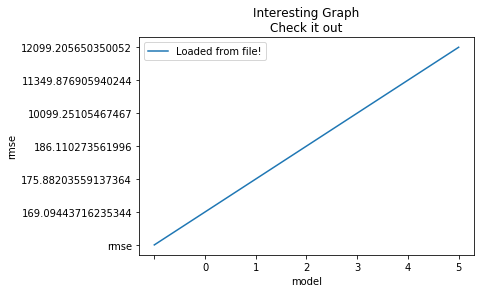

In [2]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open(r'C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\9C8mupedb_EmpAccess_2000\e8BP5k3JL_EmpAccess_2000\cg2qaOzf0_EmpAccess_2000\cg2qaOzf0Melbournehousingprices_2000_leaderboard.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append((row[0]))
        y.append((row[3]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('model')
plt.ylabel('rmse')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [3]:
df_metrix = pd.read_csv(r"C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\model_metrics.csv")

In [4]:
y = df_metrix[['model_id','mse', 'rmse','mae','rmsle','mean_residual_deviance']]

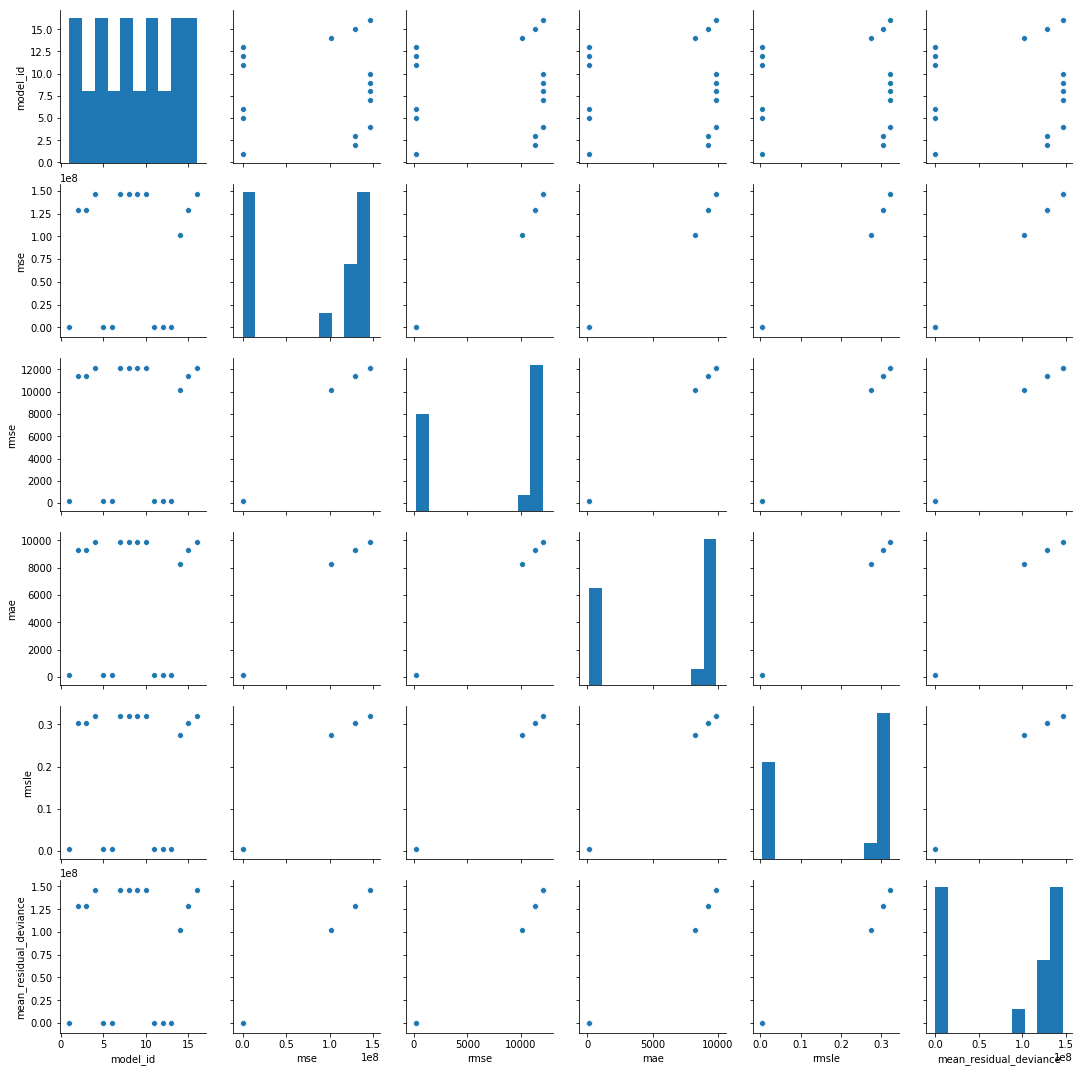

In [5]:
sns.pairplot(y)

# Conclusion

<h4 align="justify"> The automl is ran in the dataset after cleaning the data and checking the missing values. The runtime of 1000 seconds gave 6 models in the leaderboard, 2 out of them was Gradient Boosting Models, 2 Stacked Ensemble Models while other 2 are Generalised Linear Model.The automl consumed 2GB to run this notebook. The generated parameters and hyperparameters are saved in jason file. The hyperparameter which are important in case of GBM is col_sample_rate, learn_rate, max_depth, sample rate, number of trees with the respective ranges 1.0,(0.07-0.09), (7-10), (0.5-0.9), (800-1000). The important hyperparameter of GLM with thier appropriate ranges are tweedie_variance_power - ((-2) - 0), tweedie_link_power - ((-1) - 2), alpha - (1), lambda - (0.001 - 0.002). The Stacked Ensemble Model aren't taken into consideration for now as they are formed by taking the mean values of residual deviance in case of regression.
All the hyperparameter which are important and their ranges are calculated by applying random grid search in the given models i.e GLM and GBM. Through random grid search result where we got 58.77 RMSE in case of GBM and 0.004 in case of GLM. We tuned the hyperparameter of both the algorithms generated by automl.
The difference in the model with respect to their residual veriance can be clearly seen in the barplot and the best performed model by the automl can be seen in the pairplot formed. These hyperparmeter for the dataset can be further used in future to generate a hyperparameter database which will produce the range without search which can later be used to visualize and understand statistical concepts of bias/variance trade off.</h4>

# Contribution
**My contribution is 60% while 40% is the materials i have taken from internet**

# Citation

 - docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html
 - https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O 
 - https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O
 - https://github.com/prabhuSub/Hyperparamter-Samples
 - https://github.com/ResidentMario/missingno
 - https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 
 - https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python 
 - https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
 - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

# License

<h4 align="justify">Copyright 2019 Jyoti Goyal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</h4>